In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
img=cv2.imread('frog.jpeg')
img.shape

(484, 500, 3)

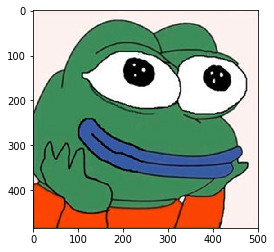

In [3]:
plt.imshow(img)

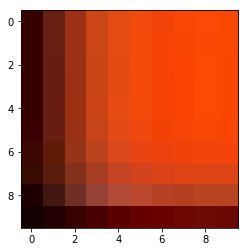

In [74]:
p = 10
roi = img[-p:, :p] 
plt.imshow(roi)

In [80]:
np.mean(np.mean(roi, axis=0), axis=0)

array([177.51,  51.51,  13.82])

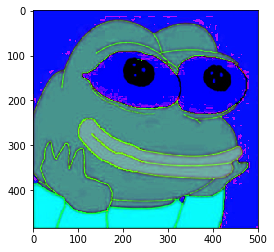

In [81]:
img_luv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img_luv)

In [12]:
img_resized = cv2.resize(img, (50,40), cv2.INTER_LINEAR)
img_resized.shape

(40, 50, 3)

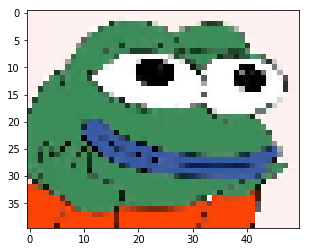

In [13]:
plt.imshow(img_resized)

In [20]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
len(flags)

274

In [63]:
lower_blue = np.array([50,0,50])
upper_blue = np.array([130,100,255])
mask = cv2.inRange(img, lower_blue, upper_blue)
np.unique(mask)

array([  0, 255], dtype=uint8)

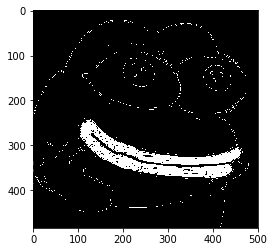

In [43]:
plt.imshow(mask, cmap='gray')

In [50]:
res = cv2.bitwise_and(img, img, mask=mask)

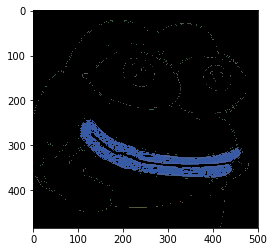

In [53]:
plt.imshow(res, cmap='gray')

In [59]:
a = np.arange(10)

In [60]:
mask = cv2.inRange(a, 2,5)

In [61]:
np.count_nonzero(mask)

4

In [62]:
mask

array([[  0],
       [  0],
       [255],
       [255],
       [255],
       [255],
       [  0],
       [  0],
       [  0],
       [  0]], dtype=uint8)

In [191]:
영수증 = cv2.imread('영수증.jpg')
#영수증 = np.transpose(영수증, [1, 0, 2])
gray = cv2.cvtColor(영수증, cv2.COLOR_RGB2GRAY)
영수증.shape

(493, 454, 3)

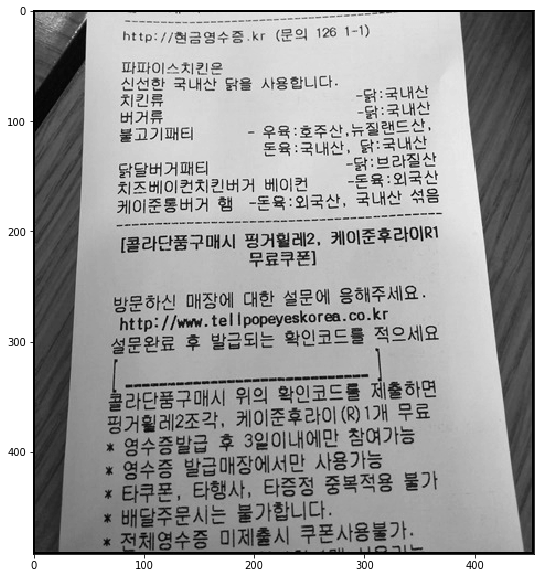

In [192]:
plt.figure(figsize=(10,10))
plt.imshow(gray, cmap='gray')

In [193]:
ret, th1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                            cv2.THRESH_BINARY,9, 3)

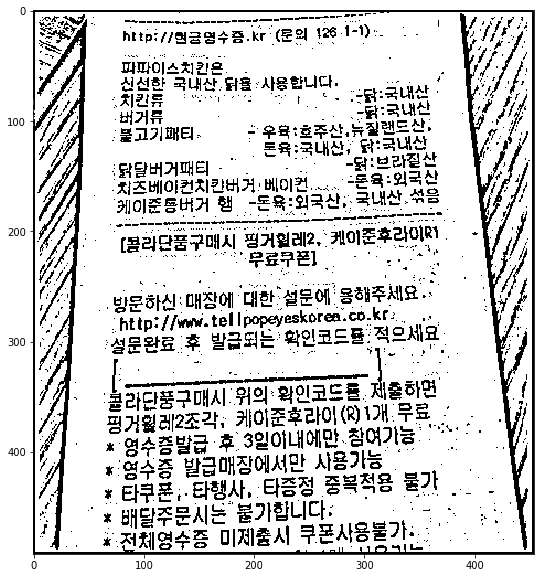

In [194]:
plt.figure(figsize=(10,10))
plt.imshow(th2, cmap='gray')

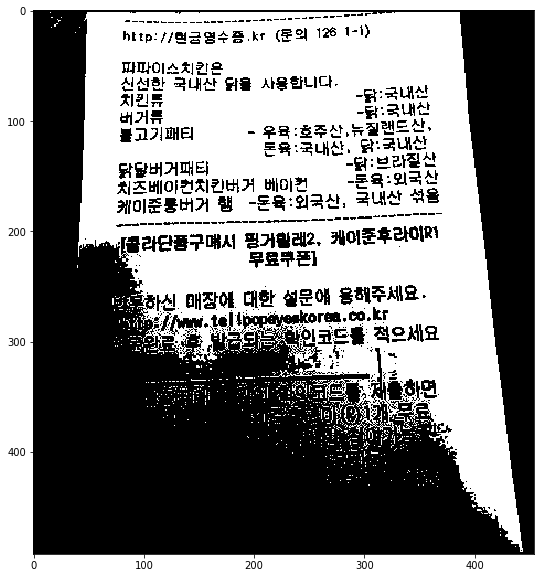

In [195]:
plt.figure(figsize=(10,10))
plt.imshow(th1, cmap='gray')

In [189]:
res = cv2.resize(gray, None, fx=.5, fy=.5)

In [190]:
gray.shape, res.shape

((454, 493), (227, 246))

#### 좌표 변환

이동

In [217]:
tx = 150
ty = 20
M = np.float32([[1,0,tx],[0,1,ty]])
dst = cv2.warpAffine(th2, M, gray.shape)
dst.shape

(454, 493)

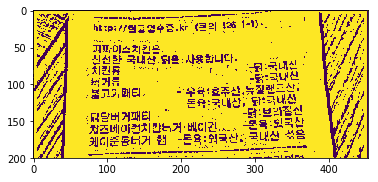

In [218]:
plt.imshow(th2[:200])

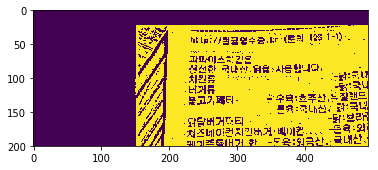

In [219]:
plt.imshow(dst[:200])

회전

In [230]:
h, w = th2.shape
angle = -15
scale = 1
M = cv2.getRotationMatrix2D((h/2, w/2), angle, scale)
dst = cv2.warpAffine(th2, M, th2.shape)

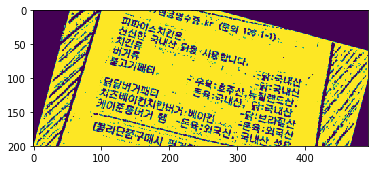

In [231]:
plt.imshow(dst[:200])

아핀 변환

In [405]:
#점 3개 [[x, y],[x, y],[x, y]]
pts1 = np.float32([[50,50],[50,200], [200,50]])
pts2 = np.float32([[10,10],[10,250], [200,10]])
M = cv2.getAffineTransform(pts1, pts2)
M

array([[ 1.26666667e+00,  0.00000000e+00, -5.33333333e+01],
       [-7.10542736e-17,  1.60000000e+00, -7.00000000e+01]])

In [414]:
g = np.copy(영수증)
RED = (255, 0, 0)
YELLO = (255, 255, 0)
for i in range(len(pts1)):
    cen1 = tuple(pts1[i])
    cen2 = tuple(pts2[i])
    g = cv2.circle(g, center=cen1, radius=7, color=RED, thickness=5)
    g = cv2.circle(g, center=cen2, radius=5, color=YELLO, thickness=3)

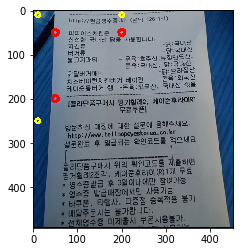

In [415]:
plt.imshow(g)

In [418]:
dst = cv2.warpAffine(g, M, g.shape[:2])

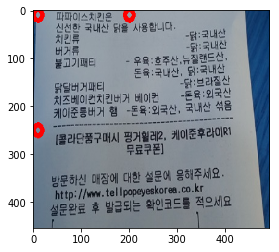

In [419]:
plt.imshow(dst)

관점 변환 Perspective Transformation

In [423]:
#점 3개 [[x, y],[x, y],[x, y]]
pts1 = np.float32([[50,50],[50,200], [200,50], [200,250]])
pts2 = np.float32([[10,10],[10,250], [200,10], [250,300]])
M = cv2.getPerspectiveTransform(pts1, pts2)
M

array([[ 1.44292731e+00, -1.17878193e-02, -6.16699411e+01],
       [ 9.52848723e-03,  1.28722986e+00, -5.49508841e+01],
       [ 9.52848723e-04, -1.17878193e-03,  1.00000000e+00]])

In [424]:
g = np.copy(영수증)
RED = (255, 0, 0)
YELLO = (255, 255, 0)
for i in range(len(pts1)):
    cen1 = tuple(pts1[i])
    cen2 = tuple(pts2[i])
    g = cv2.circle(g, center=cen1, radius=7, color=RED, thickness=5)
    g = cv2.circle(g, center=cen2, radius=5, color=YELLO, thickness=3)

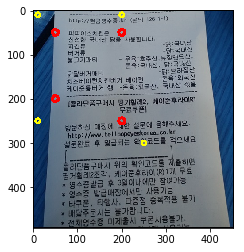

In [425]:
plt.imshow(g)

In [427]:
dst = cv2.warpPerspective(g, M, g.shape[:2])

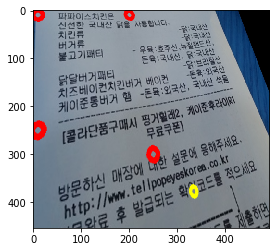

In [429]:
plt.imshow(dst)